## Supervised learning

This is my study notes of learning the coursera machine learning [Linear Regression part](https://www.coursera.org/learn/machine-learning/home/week/2). 

Supervised learning problems are categorized into `regression` and `classification` problems. In a regression problem, we are trying to predict results within a **continuous output**, meaning that we are trying to map input variables to some continuous function. In a classification problem, we are instead trying to predict results in a **discrete output**. In other words, we are trying to map input variables into discrete categories.


### Regression
So we are preicting results in a continuous oupt, the hypothesis funciton for a linear problem could be written like:

![hypothesis equation](../images/hypothesis.png)

Our goal here is to **get the theta** so we could use the hypothesis function to predict new data.
How we gonna get theta? We use trainning data, for example for **m trainning examples**, **n features**, we have a m*n matrix that every row is a single training input, and there are two ways to solve this m*n hypothesis equation problem to get theta:
1. **Analystical way**: using the matrix calculation like **Normal Equation**, Complexity **O(kn^2)**
2. **Numerical way**: solve the cost function by using **Gradient Descent**, Complexity **O(n^3)**

Usually we use analystic way if features of the problem are relative small, like **n < 10,000**, where n is the **number of features**. 
And we use numerical way when features are large, **n > 10,000**. Because of the complexity difference.

#### Analystical way - Normal Equation:
![normal equation](../images/normalequ.png)

Note, when m < n, the X^T*X does not inverseable (when m == n, maybe not inversible), so here we need to calculate the [Moore–Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) - the **pinv** function in matlab/octave or numpy. 

#### Numerical way - Gradient Descent
We can measure the accuracy of our hpothesis function by using the **cost function** or **loss function**:
![cost equation](../images/costfn.png)

which is a function of theta, and our goal is to get the global minimum of the function -using gradient descent. We take the derivative of each theta and let them equal to 0, we can get the following equation
![gradient descent function](../images/gd.png)
and it turns out, that if we choose a sufficiently small **learning rate - alpha**, the cost function could recrease on every iteration, but if alpha is too small, gradient descent can be very slow to converge. So, **how can we speed up the gradient descent?** -- **Feature Scaling**

##### Feature Scaling
the theta will decrease slowly on large ranges, and quickly on small ranges. For example, one feature could be from 1 - 1000. We usually use two techniques together - **feature scaling** and **mean nrmalization**
1. feature scaling: dividing the input values by the range or standard deviation of the input variable, resulting new range of just 1
2. mean normalization: substracting the average value for an input variable from the values for that input variable, resulting in a new average value of 0.
   ![feature scaling equation](../images/fc.png)

### Features and Polynomial Regression

if our prediction does not fit the data well, or the data is not linear, we could add more features to make the hypothsis function quadratic, cubic or square root, so our hypothsis could fit our data. Note that feature scaling is very important in this case, because for range 1 -1000 could become 1 - 1000000  if you adding the cubic feature.

--------------
--------------


## Linear Regression Exercise

we have 2 exercises here, first one is the **Liear Regression with one variable**, another is **with multi variables**, but first, let me defien the function to calculate the gradient descent and cost function, which are shared in both exercises 

In [1]:
%COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
%   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y
function J = computeCostMulti(X, y, theta)
    m = length(y); % number of training examples

    J = 0;

    for i = 1:m
       J = J + (X(i,:)*theta - y(i))^2/2/m;
    end
end
 
 
%GRADIENTDESCENTMULTI Performs gradient descent to learn theta
%   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
function [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)
  m = length(y); % number of training examples
  J_history = zeros(num_iters, 1);

  n = length(theta); % number of features

  for iter = 1:num_iters
      delta = zeros(n,1);
      for i = 1:m
        for j = 1:n
          delta(j) = delta(j)  + (X(i,:)*theta - y(i))*X(i,j);
        end
      end

      theta = theta - delta*alpha/m;

      % Save the cost J in every iteration
      J_history(iter) = computeCostMulti(X, y, theta);

  end
end


### one variable - profits for a food truck
we predict the profit using the population of the city

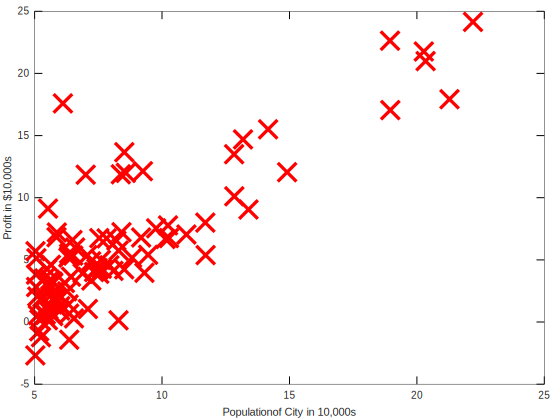

In [2]:
%% Initialization
clear ; close all; clc

data = load('ex1data1.txt');
X = data(:, 1); y = data(:, 2);
m = length(y); % number of training examples

% Plot Data
figure; 
plot(X,y,'rx','MarkerSize', 10);
ylabel('Profit in $10,000s');
xlabel('Population of City in 10,000s');

In [3]:
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;


% compute and display initial cost
J = computeCost(X, y, theta);
fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);

J = computeCost(X, y, [-1 ; 2]);
fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);


With theta = [0 ; 0]
Cost computed = 32.072734

With theta = [-1 ; 2]
Cost computed = 54.242455


In [4]:
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);

Theta found by gradient descent:
-3.630291
1.166362


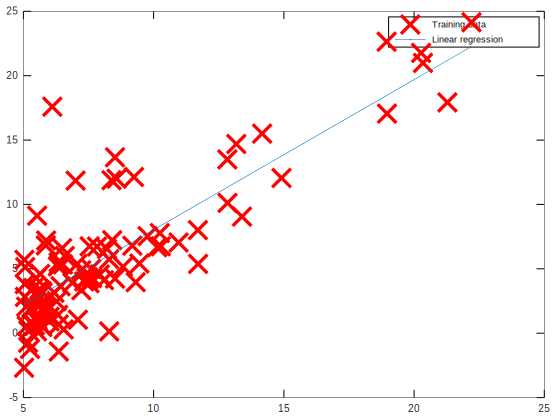

In [5]:
plot(data(:, 1),data(:, 2),'rx','MarkerSize', 10);
hold on;
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')

In [6]:
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n',...
    predict1*10000);

For population = 35,000, we predict a profit of 4519.767868


Visualizing J(theta_0, theta_1) ...


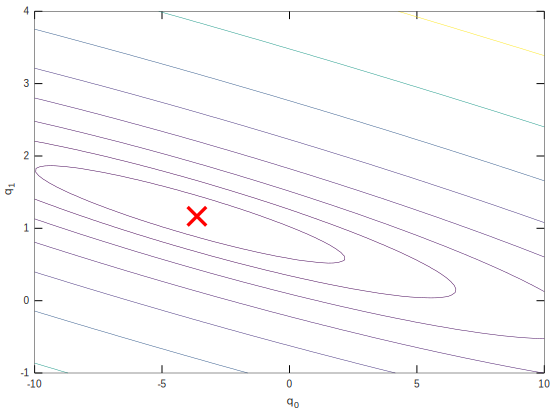

In [7]:
%% ============= Part 4: Visualizing J(theta_0, theta_1) =============
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];
	  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);

### multi variable - predict house price


In [12]:
%% ================ Part 1: Feature Normalization ================

%% Clear and Close Figures
clear ; close all; clc

%% Load Data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

% Scale features and set them to zero mean
fprintf('Normalizing Features ...\n');

[X mu sigma] = featureNormalize(X);

% Add intercept term to X
X = [ones(m, 1) X];

First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 
Normalizing Features ...
size =  2


Theta computed from gradient descent: 
 340398.694491 
 109855.300268 
 -5873.743442 

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293236.305203


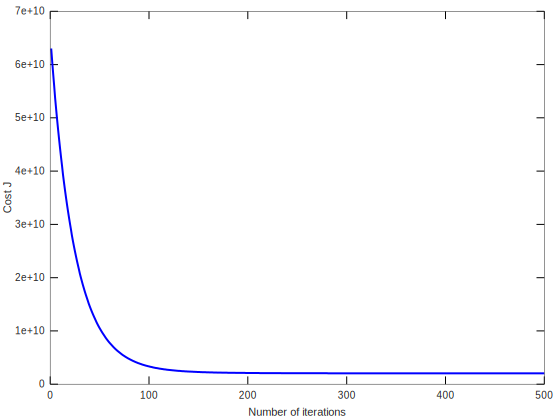

In [13]:
%% ================ Part 2: Gradient Descent ================
% Choose some alpha value
alpha = 0.02;
num_iters = 500;

% Init Theta and Run Gradient Descent
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');

% Estimate the price of a 1650 sq-ft, 3 br house
data = [1650 3];
normalizedData = (data - mu) ./ sigma;
normalizedData = [1 normalizedData];
price = normalizedData * theta;

% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);


In [14]:
%% ================ Part 3: Normal Equations ================
%% Load Data
data = csvread('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');


% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
price = [1 1650 3] * theta; % You should change this


% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);

Theta computed from the normal equations: 
 89597.909544 
 139.210674 
 -8738.019113 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335


**Compare the result** get from the Gradient Descent result **293236.305203** and Normal Equation result **293081.464335**, they are pretty close, and if you adding the iteration, the gradient descent result will get more close to the normal equation result: try increase the `num_iters` to 1000, you will get result **293083.696778**